<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-data-analysis-overview" data-toc-modified-id="Exploratory-data-analysis-overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory data analysis overview</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Variables" data-toc-modified-id="Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Variables</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Pre-processing-functions" data-toc-modified-id="Pre-processing-functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Pre-processing functions</a></span></li><li><span><a href="#Exploration-functions" data-toc-modified-id="Exploration-functions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exploration functions</a></span></li><li><span><a href="#Plotting-functions" data-toc-modified-id="Plotting-functions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plotting functions</a></span></li></ul></li><li><span><a href="#Operations" data-toc-modified-id="Operations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Operations</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Pre-process-data" data-toc-modified-id="Pre-process-data-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Pre-process data</a></span><ul class="toc-item"><li><span><a href="#Pre-process-Manufacturer-and-Camera-Model" data-toc-modified-id="Pre-process-Manufacturer-and-Camera-Model-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Pre-process Manufacturer and Camera Model</a></span></li><li><span><a href="#Pre-process-Exposures" data-toc-modified-id="Pre-process-Exposures-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Pre-process Exposures</a></span></li><li><span><a href="#Pre-process-Focal-Lengths" data-toc-modified-id="Pre-process-Focal-Lengths-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Pre-process Focal Lengths</a></span></li><li><span><a href="#Pre-process-Apertures" data-toc-modified-id="Pre-process-Apertures-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Pre-process Apertures</a></span></li><li><span><a href="#Creating-categories" data-toc-modified-id="Creating-categories-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>Creating categories</a></span></li></ul></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Exploration</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li><li><span><a href="#Exports" data-toc-modified-id="Exports-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exports</a></span></li></ul></div>

# Exploratory data analysis overview


This notebook takes [EXIF](https://en.wikipedia.org/wiki/Exif/ "What is EXIF?")data scraped from [Flickr](https://www.flickr.com/ "Flickr Homepage") to clean it up and perfrom basic exploratory analysis.   

It requires the pickle file or files outputted from the main extractor script found in the `/data` directory of the project after scrape is perfromed.
Several `.pickle` files corresponding to a multiple-part scrape can be ingested and combined using the provided helper functions.
The result is then cast into one or more Pandas dataframes for analysis and plotting.

There is a export helper function to output a dataset as CSV or H5

# Imports #

In [1]:
import pickle
import time
import math
import itertools
import pandas as pd
import pprint
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import display, HTML
#from fuzzywuzzy import fuzz 
#from fuzzywuzzy import process 

# Variables #

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]
plt.style.use('ggplot')
pp = pprint.PrettyPrinter(indent=1)

# Functions #

## Pre-processing functions ##

In [3]:
#outputs the data in a csv file to use in other applications e.g. RAW Graphs
#To input in RAW set RAW as True so as to remove the CSV headers.
def write_tocsv(RAW = False):
    try:
        if RAW is False:
            out_to_csv = input("Chose a file name:")
            out_to_csv = str(out_to_csv)            
            data.to_csv(r'data/%s.csv'% out_to_csv)
            print("CSV file has been writen to", out_to_csv)
        elif RAW is True:
            out_to_csv = input("Chose a file name:")
            out_to_csv = str(out_to_csv)             
            data.to_csv(r'data/%s.csv'% out_to_csv, header=False)
            print("CSV file has been writen to", out_to_csv, "(with no headers).")
    except:
        pass

In [4]:
#loads .pickle part files as variables
#Files need to be in the data folder in the project directory
#FIles need to be named int he form <partX.pickle>
#use the merge_parts() function to merge them into a single dictionary
def load_data(number_of_parts):
    try:
        if number_of_parts > 0 <100:
            parts = []
            for i in range (number_of_parts+1):
                parts.append(i)
                
                #parts = parts[1:]
            parts = parts [1:]
            print("You have selected to load", len(parts),"parts.")
        else: raise ValueError 
    except ValueError:
                  print("Parameter passed needs to be a positive integer 1-100")
    for n, part in enumerate(parts, 1):
        try:
            pickle_file_path = "data/part" + str(part) + ".pickle"
            with open(pickle_file_path, 'rb') as handle:\
            globals()["part%d"%n] = pickle.load(handle)
        except OSError:
            print("Something went wrong loading the files. Are you sure there are <partX.pickle> files in the </data> folder of the project?...")
    print("All parts have been written as separate variables <part1 - partX>")
    print("You can now merge the parts if need be with the <merge_parts> helper function.")

In [5]:
#Removes the outermost nesting level of the of the dictionary to only preserve the values
#use before casting dict inot pandas
def clean_vars():
    for ID, exif in data.items():
        for key, val in exif.items():
            exif[key] = val['value']
    print("<data> dictionary has been stripped of outermost level of nested structure. Only values are preserved.")

In [6]:
#helper function to merges all parts into a single dictionary
def merge_parts(*dict_args):
    #Given any number of dicts, shallow copy and merge into a new dict,
    #precedence goes to key value pairs in latter dicts.
    result = {}
    for dictionary in dict_args:
        result.update(dictionary)
    return result

In [7]:
#converts exposure values into milliseconds
def frac_to_ms(value):
    frac = 1/value
    ms = frac*1000
    return ms

In [8]:
#converts exposure values in milliseconds back into fractions
def ms_to_frac(value):
    sec = value/1000
    frac = 1/sec
    return frac

In [9]:
#converts exposure values in milliseconds back into exposures
def frac_to_exp(value):
    if value == 1:
        return "1"
    elif value > 1:
        exp = int(value)
        exp = str(exp)
        exp = "1/"+exp
        return exp
    elif value < 1:
        return "Bulb"

## Exploration functions ##

In [10]:
# casts into pandas dataframe and transposes values from dict into columns
def data_info(data):
    global df
    total_scraped = 103077 #number of items in the visual genome with a valid flickr ID
    dataset_percentage = (len(data)*100)/total_scraped
    dataset_percentage = round(dataset_percentage, 2)
    print("A total of", len(data), "items out of", total_scraped , "items with a valid Flickr ID were scraped. This correponds to", dataset_percentage, "% of entries in the Visual Genome dataset") 
    df = pd.DataFrame.from_dict(data, orient='columns')
    df = df.transpose()
    print("Data has been cast to a pandas dataframe <df>")
    print('Dataframe general info:')
    df.info()
    print('First 10 entries in the dataframe:')
    df.head(10)
    return df

In [11]:
def preprocess(data):
    global df1
    #export dataframe that is readable by humans as a secondary dataframe
    
    data = data.drop(['TimeStamp'], axis=1) #Dropping timestamp
    data['Lens'] = data['Lens'].fillna('unknown') #replaces NaN values for str 'unknown'
    #df['Lens'] = df['Lens'].astype('category')
    data = data.dropna() #drops NaN values from every other column
    #data['Make'] = data['Make'].astype('category')
    data['CameraModel'] = data['CameraModel'].astype('category')
    #data["Aperture"] = data['Aperture'].astype('category')
    data["Aperture"] = pd.to_numeric(data['Aperture'], errors='coerce')
    data['FocalLength'] = data['FocalLength'].apply(lambda x: x.replace('mm', ''))
    data['FocalLength'] = pd.to_numeric(data['FocalLength'], downcast='signed', errors='coerce')
    #data['FocalLength'] = data['FocalLength'].astype('category')
    data['Exposure'] = data['Exposure'].apply(lambda x: x.replace('1/', ''))
    data['Exposure'] = pd.to_numeric(data['Exposure'], errors='coerce')
    #data['Exposure'] = data['Exposure'].replace([0], np.nan)
    #data['Exposure'] = data['Exposure'].dropna()
    #df['Exposure'] = df['Exposure'].apply(lambda x: exp_conv_Float(x))
    #data['Exposure'] = data['Exposure'].astype('category')
    
    data = data.dropna() #drops NaN values from every other column
    

    # consolidate some duplicated camera manufacturers
    data['Make'] = data['Make'].apply(lambda x: x.replace('NIKON CORPORATION', 'Nikon'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('NIKON', 'Nikon'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('PENTAX Corporation', 'Pentax'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('PENTAX', 'Pentax'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('SONY', 'Sony'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('FUJIFILM', 'Fujifilm'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('OLYMPUS IMAGING CORP.', 'Olympus'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('OLYMPUS IMAGING CORP. ', 'Olympus'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('OLYMPUS CORPORATION', 'Olympus'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('EASTMAN KODAK COMPANY', 'Eastman Kodak'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('SAMSUNG', 'Samnsung'))
    
    data = data.dropna() #drops NaN values from every other column
    data = data.replace('unknown',np.NaN)
    data['Make'] = data['Make'].astype('category')
    
    data.info()
    data.describe()
    df1 = data
    print("Data has been parsed and written to a machine-readable dataframe called 'df1'")

In [12]:
'''DEPRECATED

def preprocess_human_readable(data):
    global df2
    #export dataframe that is readable by humans as a secondary dataframe
    
    data = data.drop(['TimeStamp'], axis=1) #Dropping timestamp
    data['Lens'] = data['Lens'].fillna('unknown') #replaces NaN values for str 'unknown'
    #df['Lens'] = df['Lens'].astype('category')
    data['Make'] = data['Make'].astype('category')
    data['CameraModel'] = data['CameraModel'].astype('category')
    data["Aperture"] = data['Aperture'].astype('category')
    #df['FocalLength'] = df['FocalLength'].apply(lambda x: x.replace('mm', '')).astype('category')
    data['FocalLength'] = data['FocalLength'].astype('category')
    #df['Exposure'] = df['Exposure'].apply(lambda x: x.replace('1/', ''))
    #df['Exposure'] = pd.to_numeric(df['Exposure'], errors='coerce')
    #df['Exposure'] = df['Exposure'].replace([0], np.nan)
    #df['Exposure'] = df['Exposure'].dropna()
    #df['Exposure'] = df['Exposure'].apply(lambda x: exp_conv_Float(x))
    data['Exposure'] = data['Exposure'].astype('category')
            
    data = data.dropna() #drops NaN values from every other column
    data = data.replace('unknown',np.NaN)
    
    # consolidate duplicated camera manufacturers
    data['Make'] = data['Make'].apply(lambda x: x.replace('NIKON CORPORATION', 'Nikon'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('NIKON', 'Nikon'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('PENTAX Corporation', 'Pentax'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('PENTAX', 'Pentax'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('SONY', 'Sony'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('FUJIFILM', 'Fujifilm'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('OLYMPUS IMAGING CORP.', 'Olympus'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('OLYMPUS IMAGING CORP. ', 'Olympus'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('OLYMPUS CORPORATION', 'Olympus'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('EASTMAN KODAK COMPANY', 'Eastman Kodak'))
    data['Make'] = data['Make'].apply(lambda x: x.replace('SAMSUNG', 'Samnsung'))


    data.info()
    display(data)
    df2 = data
    print("Data has been parsed and written to a human-readable dataframe called 'df2'")
    '''

'DEPRECATED\n\ndef preprocess_human_readable(data):\n    global df2\n    #export dataframe that is readable by humans as a secondary dataframe\n    \n    data = data.drop([\'TimeStamp\'], axis=1) #Dropping timestamp\n    data[\'Lens\'] = data[\'Lens\'].fillna(\'unknown\') #replaces NaN values for str \'unknown\'\n    #df[\'Lens\'] = df[\'Lens\'].astype(\'category\')\n    data[\'Make\'] = data[\'Make\'].astype(\'category\')\n    data[\'CameraModel\'] = data[\'CameraModel\'].astype(\'category\')\n    data["Aperture"] = data[\'Aperture\'].astype(\'category\')\n    #df[\'FocalLength\'] = df[\'FocalLength\'].apply(lambda x: x.replace(\'mm\', \'\')).astype(\'category\')\n    data[\'FocalLength\'] = data[\'FocalLength\'].astype(\'category\')\n    #df[\'Exposure\'] = df[\'Exposure\'].apply(lambda x: x.replace(\'1/\', \'\'))\n    #df[\'Exposure\'] = pd.to_numeric(df[\'Exposure\'], errors=\'coerce\')\n    #df[\'Exposure\'] = df[\'Exposure\'].replace([0], np.nan)\n    #df[\'Exposure\'] = df[\'Exp

In [13]:
#Outputs basic information about the equipment used:
#Camera manufacturer, model, and lens type + a compounded 'equipment' category
#Categories are exported as global variables to be used by the plot function

def explore_equipment(data, raw = True):
    
    if raw is True:
        print('Initial exploration of unparsed data.')
        print('')
        print('········')
        print('')
        print('There are', data['Make'].count(), 'items with available data in the manufacturer field.')
        print("This is", round(((data['Make'].count()) *100 / (len(data))), 2), "% of the total number of items.")
        print('')
        print('········')
        print('')
        print('There are', data['CameraModel'].count(), 'items with available data in the camera model field.')
        print("This is", round(((data['CameraModel'].count()) *100 / (len(data))), 2), "% of the total number of items.")
        print('')
        print('········')
        print('')
        print('There are', data['Lens'].count(), 'items with available data in the lens field.')
        print("This is", round(((data['Lens'].count()) *100 / (len(data))), 2), "% of the total number of items.")
    
    else:
        global by_make
        global by_model
        global by_lens
        global by_eq
        
        print("There are", len(data['Make'].unique()), 'unique values for camera manufacturer.')
        by_make = data.groupby('Make').size()
        by_make = by_make.sort_values(ascending=False) #sort values
        print("Top 5 manufacturers:")
        print(by_make.head(5))
        print('········')
        
        print("There are", len(data['CameraModel'].unique()), 'unique values for camera model.')
        by_model = data.groupby('CameraModel').size()
        by_model = by_model.sort_values(ascending=False) #sort values
        print('Top 5 camera models:')
        print(by_model.head(5))
        print('········')
        
        print("There are", len(data['Lens'].unique()), 'unique values for lens.')
        by_lens = data.groupby('Lens').size()
        by_lens = by_lens.sort_values(ascending=False) #sort values
        print('Top 5 lenses:')
        print(by_lens.head(5))
        
        by_eq = data.groupby(['Make', 'CameraModel']).size()
        by_eq = by_eq.sort_values(ascending=False)
    

In [14]:
#Outputs basic information about the camera parameters specific to each photograph:
#Exposure, aperture and focal length
#Categories are exported as global variables to be used by the plot function

def explore_practice(data, raw = True): #toggle this before and after parsing
    
    if raw is True:
        print('Initial exploration of unparsed data.')
        print('')
        print('········')
        print('')
        print('There are', data['Exposure'].count(), 'items with available data in the exposure field.')
        print("This is", round(((data['Exposure'].count()) *100 / (len(data))), 2), "% of the total number of items.")
        print('')
        print('········')
        print('')
        print('There are', data['Aperture'].count(), 'items with available data in the aperture field.')
        print("This is", round(((data['Aperture'].count()) *100 / (len(data))), 2), "% of the total number of items.")
        print('')
        print('········')
        print('')
        print('There are', data['FocalLength'].count(), 'items with available data in the focal length field.')
        print("This is", round(((data['FocalLength'].count()) *100 / (len(data))), 2), "% of the total number of items.")
    
    else:
        global by_exp
        global by_ap
        global by_fl
        global by_practice
        
        print("There are", len(data['Exposure'].unique()), 'unique exposure values.')
        by_exp = data.groupby('Exposure').size()
        by_exp = by_exp.sort_values(ascending=False) #sort values
        print("Top 5 exposures (as fractions of a second):")
        print(by_exp.head(5)) 
        print('········')
        
        print("There are", len(data['Aperture'].unique()), 'unique aperture values.')
        by_ap = data.groupby('Aperture').size()
        by_ap = by_ap.sort_values(ascending=False) #sort values
        print('Top 5 apertures (in f stops):')
        print(by_ap.head(5))
        print('········')
        
        print("There are", len(data['FocalLength'].unique()), 'unique values for Focal Length.')
        by_fl = data.groupby('FocalLength').size()
        by_fl = by_fl.sort_values(ascending=False) #sort values
        print('Top 5 focal lengths (in mm):')
        print(by_fl.head(5))
        
        by_practice = data.groupby(['Aperture_cat','FocalLength_cat', 'Exposure']).size()
        by_practice = by_practice.sort_values(ascending=False) #sort values

## Plotting functions ##

In [57]:
#initial plotting function
#aspect parameter is one of the groupings created using the explore functions:
#by_exp
#by_ap
#by_fl
#by_practice
#by_make
#by_model
#by_lens
#by_eq
#by_eq_nolens

def plot_by(aspect, bins, y_label = "y label placeholder"):
    plot = aspect.head(bins).plot(kind='barh') # change head to convenience
    # Set the x scale because otherwise it goes into weird negative numbers
    #ax.set_xlim((0, 70000))

    # Set the x-axis label
    plot.set_xlabel("Number of images")

    # Set the y-axis label
    plot.set_ylabel(y_label)

# Operations #

## Load data ##

In [16]:
#Load data parts
load_data(11)

You have selected to load 11 parts.
All parts have been written as separate variables <part1 - partX>
You can now merge the parts if need be with the <merge_parts> helper function.


In [17]:
#merge all parts
data = merge_parts(part1, part2, part3, part4, part5, part6, part6, part7, part8, \
part9, part10, part11)
print("All parts have now merged into a single dictionary named <data>")
print("<data> has", len(data), "items in it.")

All parts have now merged into a single dictionary named <data>
<data> has 84113 items in it.


In [18]:
#strip parts of nested structure
clean_vars()

<data> dictionary has been stripped of outermost level of nested structure. Only values are preserved.


In [19]:
data_info(data) #recasts data as a pandas dataframe and transposes it

A total of 84113 items out of 103077 items with a valid Flickr ID were scraped. This correponds to 81.6 % of entries in the Visual Genome dataset
Data has been cast to a pandas dataframe <df>
Dataframe general info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84113 entries, 128827281 to 9777145091
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Make         72754 non-null  object
 1   CameraModel  73151 non-null  object
 2   Exposure     70475 non-null  object
 3   Aperture     71018 non-null  object
 4   TimeStamp    72839 non-null  object
 5   FocalLength  70197 non-null  object
 6   Lens         8637 non-null   object
dtypes: object(7)
memory usage: 5.1+ MB
First 10 entries in the dataframe:


Make            CameraModel Exposure Aperture  \
128827281           Sony Ericsson                  K750i    1/500      2.8   
163614481                     NaN                    NaN      NaN      NaN   
177587881                   Canon  Canon PowerShot S2 IS    1/640      4.0   
186353981               Panasonic                DMC-FX9     1/13      3.6   
393790581                   Canon          Canon EOS 20D    1/250     11.0   
...                           ...                    ...      ...      ...   
9536592891  OLYMPUS IMAGING CORP.                   E-P5    1/250      NaN   
9650692891                  Canon           Canon EOS 7D   1/1600      2.8   
9669763691                 PENTAX             PENTAX K-x   1/1000      4.5   
9721821291                   SONY               SLT-A77V    1/160      6.3   
9777145091                   SONY               SLT-A55V    1/125     11.0   

                      TimeStamp FocalLength                         Lens  
128827281   2006:04:14 18:39:42         NaN                          NaN  
163614481                   NaN         NaN                          NaN  
177587881   2006:06:28 16:22:51     72.0 mm                          NaN  
186353981   2006:04:30 15:29:52      9.9 mm                          NaN  
393790581   2007:02:10 16:13:29    560.0 mm                          NaN  
...                         ...         ...                          ...  
9536592891  2013:08:18 11:03:44         NaN                          NaN  
9650692891  2013:08:17 17:04:50    145.0 mm  EF70-200mm f/2.8L IS II USM  
9669763691  2013:09:04 11:37:16     35.0 mm                          NaN  
9721821291  2013:09:03 09:09:12     55.0 mm     DT 18-270mm F3.5-6.3 SSM  
9777145091  2013:08:26 00:44:49     18.0 mm      DT 18-55mm F3.5-5.6 SAM  

[84113 rows x 7 columns]

## Pre-process data ####

### Pre-process Manufacturer and Camera Model

In [20]:
#outputs basic statistics per category
#explore_equipment(df)

#Note how the 'lens' field is much less commonly populated
#all other categories have +80% of avialable data

In [21]:
#explore_practice(df)

In [22]:
#preprocess_human_readable(df)

In [23]:
preprocess(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68469 entries, 177587881 to 9777145091
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Make         68469 non-null  category
 1   CameraModel  68468 non-null  category
 2   Exposure     68469 non-null  float64 
 3   Aperture     68469 non-null  float64 
 4   FocalLength  68469 non-null  float64 
 5   Lens         8528 non-null   object  
dtypes: category(2), float64(3), object(1)
memory usage: 3.0+ MB
Data has been parsed and written to a machine-readable dataframe called 'df1'


In [24]:
#helper function to consolidate 'others' categories in manufacturers
cats = []
x = dict(df1['Make'].value_counts())
for k,v in x.items():
    if v > 20:
        cats.append(k)

df1['Make'] = [j if j in cats else 'Others' for i,j in df1['Make'].iteritems()]

### Pre-process Exposures ###

In [25]:
df1.info()
df1['Exposure'].sort_values(ascending=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68469 entries, 177587881 to 9777145091
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Make         68469 non-null  object  
 1   CameraModel  68468 non-null  category
 2   Exposure     68469 non-null  float64 
 3   Aperture     68469 non-null  float64 
 4   FocalLength  68469 non-null  float64 
 5   Lens         8528 non-null   object  
dtypes: category(1), float64(3), object(2)
memory usage: 3.4+ MB


5652801149    0.0
4570890980    0.0
2892326246    0.0
6758104355    0.0
8214294432    0.0
             ... 
8730141088    inf
8846087864    inf
6719661275    inf
3745275658    inf
8871355846    inf
Name: Exposure, Length: 68469, dtype: float64

In [26]:
df1 = df1[df1['Exposure'] >= 0.3] #discard exposures over 3 seconds and infinite
df1 = df1[df1['Exposure'] <= 8000] #discard exposures under 1/8000 seconds
df1['Exposure'] = df1['Exposure'].apply(lambda x: frac_to_ms(x)) #convert exp to ms

### Pre-process Focal Lengths

In [27]:
#df1['FocalLength'].sort_values(ascending=True)

In [28]:
df1 = df1[df1['FocalLength'] >= 3] # remove all values < 3
mobile = df1[df1['FocalLength'] <= 6.3 ] # create a separate dataframe with under 6mm values
print("Estimated mobile phones:")
print(len(mobile))
ptshoot = df1[df1['FocalLength'] < 18 ]
ptshoot = ptshoot[ptshoot['FocalLength'] > 6.3 ]# create a df > 6.3 < 18mm
print("Estimated mobile point and shoot cameras:")
print(len(ptshoot))
print("Total Fl to correct:")
print(len(mobile)+len(ptshoot))

Estimated mobile phones:
15511
Estimated mobile point and shoot cameras:
12056
Total Fl to correct:
27567


In [29]:
# multipply mobile segment for iPhone sensor crop factor
mobile['FocalLength'] = mobile['FocalLength'].apply(lambda x: x*7.6)

# multipply point and shoot segment for 1/1.8" sensor crop factor
ptshoot['FocalLength'] = ptshoot['FocalLength'].apply(lambda x: x*4.8)

# See: https://en.wikipedia.org/wiki/Crop_factor for crop factors

/home/daniel/.local/share/virtualenvs/exif_extractor_dev-C4spvk_x/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#mobile.groupby(['FocalLength']).size()
#ptshoot.groupby(['FocalLength']).size()
#df1.groupby(['FocalLength']).size()

In [31]:
df1 = df1[df1['FocalLength'] >= 18] # remove all values under 18mm

In [32]:
df1 = df1.append(ptshoot) #append the corrected under 6.3-17mm values
df1 = df1.append(mobile) #append the corrected under 3-6.3mm values

In [33]:
df1.info()
df1['FocalLength'].sort_values(ascending=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68136 entries, 177587881 to 9209456291
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Make         68136 non-null  object  
 1   CameraModel  68135 non-null  category
 2   Exposure     68136 non-null  float64 
 3   Aperture     68136 non-null  float64 
 4   FocalLength  68136 non-null  float64 
 5   Lens         8525 non-null   object  
dtypes: category(1), float64(3), object(2)
memory usage: 3.3+ MB


3368475823      18.0
9074160887      18.0
2913988039      18.0
3794829244      18.0
3736324239      18.0
               ...  
4547499334     840.0
5716964852     840.0
6034656122    1000.0
9674874253    1120.0
2903445170    1200.0
Name: FocalLength, Length: 68136, dtype: float64

### Pre-process Apertures

In [34]:
df1 = df1[df1['Aperture'] >= 1.20] # remove all values under 1.2
df1 = df1[df1['Aperture'] <= 45.0] # remove all values over 45

In [35]:
df1.describe(include='all')

Make CameraModel      Exposure      Aperture   FocalLength  \
count   68085       68084  68085.000000  68085.000000  68085.000000   
unique     42        2295           NaN           NaN           NaN   
top     Canon   NIKON D90           NaN           NaN           NaN   
freq    27628        1935           NaN           NaN           NaN   
mean      NaN         NaN     40.371739      5.305951     71.932083   
std       NaN         NaN    228.733151      2.998212     77.072830   
min       NaN         NaN      0.125000      1.200000     18.000000   
25%       NaN         NaN      2.000000      3.200000     32.680000   
50%       NaN         NaN      5.154639      4.500000     45.600000   
75%       NaN         NaN     16.666667      6.300000     71.520000   
max       NaN         NaN   3333.333333     45.000000   1200.000000   

                                 Lens  
count                            8523  
unique                            559  
top     EF100-400mm f/4.5-5.6L IS USM  
freq                              353  
mean                              NaN  
std                               NaN  
min                               NaN  
25%                               NaN  
50%                               NaN  
75%                               NaN  
max                               NaN

### Creating categories

In [36]:
# Aperture f stops categories

ap_bins = [1, 1.3, 1.9, 2.7, 3.9, 5.5, 7.9, 10.9, 15.9, 21.9, 31.9, 45]
ap_names = ['f/1','f/1.4', 'f/2', 'f/2.8', 'f/4', 'f/5.6', 'f/8', 'f/11', \
            'f/16', 'f/22', 'f/32 +']

df1['Aperture_cat'] = pd.cut(df1['Aperture'], ap_bins, labels = ap_names)

In [37]:
# Focal Length categories

fl_bins = [0, 24, 35, 85, 135, 300, 1200]
fl_names = ['Ultra wide','Wide', 'Normal', 'Short telephoto',  \
            'Medium telephoto', 'Super telephoto']

df1['FocalLength_cat'] = pd.cut(df1['FocalLength'], fl_bins, labels = fl_names)

In [38]:
df1['Exposure'] = df1['Exposure'].apply(lambda x :  ms_to_frac(x))

In [39]:
df1.describe(include='all')

Make CameraModel      Exposure      Aperture   FocalLength  \
count   68085       68084  68085.000000  68085.000000  68085.000000   
unique     42        2295           NaN           NaN           NaN   
top     Canon   NIKON D90           NaN           NaN           NaN   
freq    27628        1935           NaN           NaN           NaN   
mean      NaN         NaN    419.850623      5.305951     71.932083   
std       NaN         NaN    722.337742      2.998212     77.072830   
min       NaN         NaN      0.300000      1.200000     18.000000   
25%       NaN         NaN     60.000000      3.200000     32.680000   
50%       NaN         NaN    194.000000      4.500000     45.600000   
75%       NaN         NaN    500.000000      6.300000     71.520000   
max       NaN         NaN   8000.000000     45.000000   1200.000000   

                                 Lens Aperture_cat FocalLength_cat  
count                            8523        68085           68085  
unique                            559           11               6  
top     EF100-400mm f/4.5-5.6L IS USM        f/2.8          Normal  
freq                              353        18713           34530  
mean                              NaN          NaN             NaN  
std                               NaN          NaN             NaN  
min                               NaN          NaN             NaN  
25%                               NaN          NaN             NaN  
50%                               NaN          NaN             NaN  
75%                               NaN          NaN             NaN  
max                               NaN          NaN             NaN

In [40]:
df1

Make                  CameraModel  Exposure  Aperture  \
177587881       Canon        Canon PowerShot S2 IS     640.0       4.0   
393790581       Canon                Canon EOS 20D     250.0      11.0   
449150081       Nikon                    NIKON D50     250.0       5.0   
1269775481      Canon  Canon EOS DIGITAL REBEL XTi    1250.0       4.5   
1367394681      Nikon                    NIKON D80     180.0       5.0   
...               ...                          ...       ...       ...   
7985073843    Olympus              u40D,S500,uD500     100.0       3.1   
8352808343  Panasonic                      DMC-TZ5      30.0       3.3   
8895240291      Apple                    iPhone 4S     613.0       2.4   
9050758591     Others           645 PRO for iPhone     120.0       2.8   
9209456291  Panasonic                     DMC-FS40      60.0       2.5   

            FocalLength Lens Aperture_cat  FocalLength_cat  
177587881         72.00  NaN          f/4           Normal  
393790581        560.00  NaN         f/11  Super telephoto  
449150081        125.00  NaN          f/4  Short telephoto  
1269775481        70.00  NaN          f/4           Normal  
1367394681        70.00  NaN          f/4           Normal  
...                 ...  ...          ...              ...  
7985073843        44.08  NaN        f/2.8           Normal  
8352808343        35.72  NaN        f/2.8           Normal  
8895240291        32.68  NaN          f/2             Wide  
9050758591        29.64  NaN        f/2.8             Wide  
9209456291        32.68  NaN          f/2             Wide  

[68085 rows x 8 columns]

## Exploration ##

In [41]:
#outputs basic statistics per category after parsing
explore_equipment(df1, raw=False) #toggle raw=False for unique values

There are 42 unique values for camera manufacturer.
Top 5 manufacturers:
Make
Canon        27628
Nikon        16168
Sony          5400
Panasonic     4413
Apple         2862
dtype: int64
········
There are 2296 unique values for camera model.
Top 5 camera models:
CameraModel
NIKON D90               1935
Canon EOS 5D Mark II    1768
Canon EOS 7D            1630
NIKON D80               1410
NIKON D7000             1275
dtype: int64
········
There are 560 unique values for lens.
Top 5 lenses:
Lens
EF100-400mm f/4.5-5.6L IS USM    353
EF24-105mm f/4L IS USM           326
EF-S18-55mm f/3.5-5.6 IS II      306
18.0-200.0 mm f/3.5-5.6          240
18.0-105.0 mm f/3.5-5.6          185
dtype: int64


In [42]:
#outputs basic statistics per category after parsing
explore_practice(df1, raw=False) #toggle raw=False for unique values

There are 1031 unique exposure values.
Top 5 exposures (as fractions of a second):
Exposure
60.0     6093
500.0    4196
250.0    3968
400.0    3450
200.0    3361
dtype: int64
········
There are 127 unique aperture values.
Top 5 apertures (in f stops):
Aperture
2.8    9928
5.6    8584
4.0    5845
8.0    4842
3.5    4080
dtype: int64
········
There are 942 unique values for Focal Length.
Top 5 focal lengths (in mm):
FocalLength
18.00     3631
50.00     2769
44.08     2447
200.00    2295
55.00     1833
dtype: int64


In [43]:
df1[df1['FocalLength'] < 45].head(10)

Make             CameraModel  Exposure  Aperture  \
2359793629      Nikon              NIKON D200      20.0       3.8   
2926480729     Pentax        PENTAX Optio E30     250.0       4.8   
3577230129      Nikon               NIKON D60      20.0       3.8   
4218505029      Canon  Canon EOS 400D DIGITAL     400.0      13.0   
4559490277  Panasonic                 DMC-GF1     100.0       1.7   
4676492477  Panasonic                 DMC-TZ5     400.0       4.8   
5172107877      Canon     Canon PowerShot G10     250.0       4.5   
5173510677      Nikon               NIKON D90      60.0       4.0   
5778125177      Nikon             NIKON D7000      50.0       3.5   
6173591577      Canon            Canon EOS 7D     160.0       6.3   

            FocalLength Lens Aperture_cat FocalLength_cat  
2359793629         29.0  NaN        f/2.8            Wide  
2926480729         18.0  NaN          f/4      Ultra wide  
3577230129         20.0  NaN        f/2.8      Ultra wide  
4218505029         18.0  NaN         f/11      Ultra wide  
4559490277         20.0  NaN        f/1.4      Ultra wide  
4676492477         36.4  NaN          f/4          Normal  
5172107877         25.0  NaN          f/4            Wide  
5173510677         18.0  NaN          f/4      Ultra wide  
5778125177         18.0  NaN        f/2.8      Ultra wide  
6173591577         35.0  NaN        f/5.6            Wide

## Plotting

In [50]:
f_cats = df1['Aperture_cat'].value_counts()
fl_cats = df1['FocalLength_cat'].value_counts()

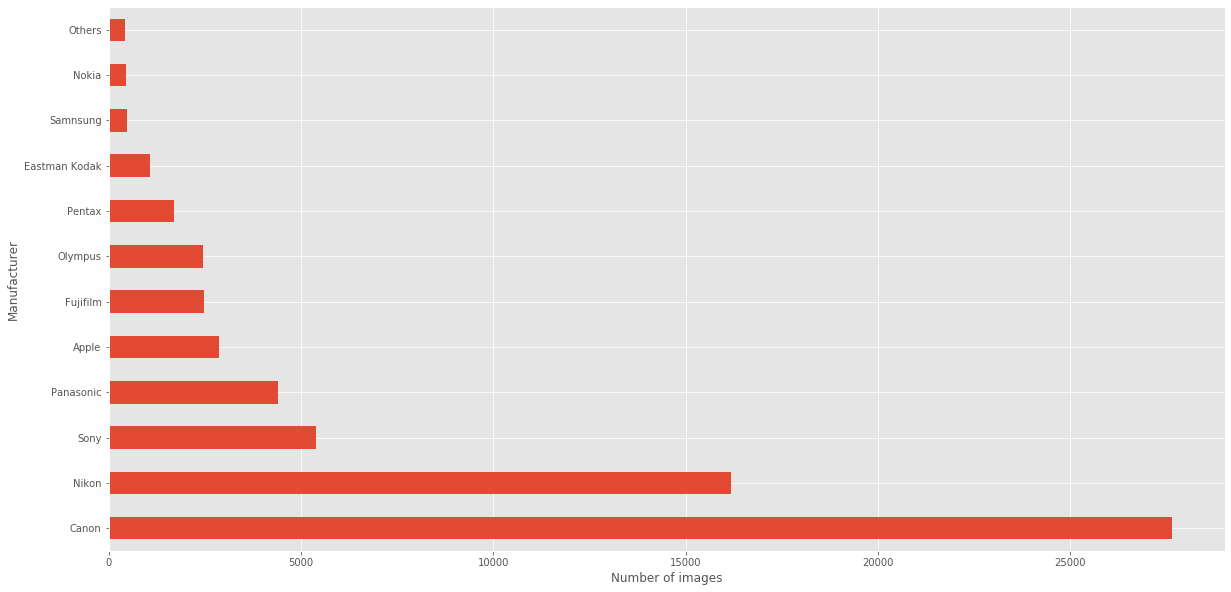

In [46]:
plot_by(by_make, 12, y_label = "Manufacturer")

In [48]:
by_model.head(10)

CameraModel
NIKON D90                      1935
Canon EOS 5D Mark II           1768
Canon EOS 7D                   1630
NIKON D80                      1410
NIKON D7000                    1275
Canon EOS 40D                  1253
Canon EOS DIGITAL REBEL XTi    1096
Canon EOS DIGITAL REBEL XT     1053
iPhone 4                       1017
NIKON D40                       997
dtype: int64

In [47]:
by_make.head(10)

Make
Canon            27628
Nikon            16168
Sony              5400
Panasonic         4413
Apple             2862
Fujifilm          2473
Olympus           2447
Pentax            1694
Eastman Kodak     1085
Samnsung           483
dtype: int64

In [132]:
by_eq.sort_values(ascending=False).head(30)

Make   CameraModel                
Nikon  NIKON D90                      1935
Canon  Canon EOS 5D Mark II           1768
       Canon EOS 7D                   1630
Nikon  NIKON D80                      1410
       NIKON D7000                    1275
Canon  Canon EOS 40D                  1249
       Canon EOS DIGITAL REBEL XTi    1096
       Canon EOS DIGITAL REBEL XT     1053
Apple  iPhone 4                       1017
Nikon  NIKON D40                       997
Canon  Canon EOS 400D DIGITAL          884
Nikon  NIKON D300                      852
       NIKON D50                       847
Apple  iPhone 4S                       802
Canon  Canon EOS DIGITAL REBEL XSi     775
       Canon EOS 50D                   765
Nikon  NIKON D40X                      707
Canon  Canon EOS 450D                  654
Nikon  NIKON D200                      635
       NIKON D60                       608
Canon  Canon EOS REBEL T2i             599
Nikon  NIKON D700                      585
Canon  Canon EOS 20

In [135]:
df1['Lens'].head()

177587881     NaN
393790581     NaN
449150081     NaN
1269775481    NaN
1367394681    NaN
Name: Lens, dtype: object

In [134]:
df1[df1['Lens'] == 'EF100-400mm f/4.5-5.6L IS USM'].tail(50)

Make            CameraModel  Exposure  Aperture  FocalLength  \
7662416628  Canon  Canon EOS 5D Mark III    1000.0       5.6        400.0   
6035134480  Canon          Canon EOS 50D     400.0       8.0        100.0   
9250927175  Canon  Canon EOS 5D Mark III     640.0       5.6        310.0   
6903161625  Canon           Canon EOS 7D    1000.0       5.6        100.0   
6072308674  Canon          Canon EOS 50D     800.0      10.0        100.0   
8133755321  Canon  Canon EOS 5D Mark III     640.0       5.6        400.0   
5613421573  Canon  Canon EOS-1D Mark III    1600.0       6.3        310.0   
7397906212  Canon           Canon EOS 7D    1250.0       5.6        400.0   
8299707810  Canon          Canon EOS 60D     125.0      25.0        400.0   
6023604756  Canon          Canon EOS 60D     500.0       7.1        400.0   
8513699203  Canon  Canon EOS 5D Mark III     500.0       6.3        300.0   
7817248202  Canon           Canon EOS 7D    1250.0       9.0        400.0   
8018862201  Canon  Canon EOS 5D Mark III    1000.0       5.6        400.0   
8045502098  Canon  Canon EOS 5D Mark III    1000.0       8.0        400.0   
7384564194  Canon           Canon EOS 7D    1600.0       5.6        190.0   
6023118245  Canon          Canon EOS 60D     640.0       7.1        365.0   
6822636391  Canon          Canon EOS 60D    1250.0       6.3        400.0   
7792909888  Canon  Canon EOS 5D Mark III     800.0       5.6        400.0   
8211178085  Canon  Canon EOS 5D Mark III    1000.0       7.1        400.0   
8646007431  Canon   Canon EOS 5D Mark II     800.0       5.6        260.0   
8211100383  Canon  Canon EOS 5D Mark III    1000.0       6.3        400.0   
6747699279  Canon   Canon EOS 5D Mark II     640.0       7.1        400.0   
4768706329  Canon           Canon EOS 7D     500.0       8.0        260.0   
6199640728  Canon          Canon EOS 40D    1250.0       5.6        400.0   
6009339425  Canon          Canon EOS 60D     640.0       6.3        400.0   
6023840622  Canon          Canon EOS 60D     640.0       7.1        400.0   
9594375811  Canon   Canon EOS 5D Mark II    1600.0       5.0        250.0   
9487515209  Canon           Canon EOS 7D     640.0       7.1        100.0   
6203375211  Canon          Canon EOS 40D    1600.0       5.6        400.0   
9029134204  Canon  Canon EOS 5D Mark III    8000.0       5.6        180.0   
8031226252  Canon  Canon EOS 5D Mark III     320.0       5.6        235.0   
5913527602  Canon          Canon EOS 50D     800.0       6.3        310.0   
8211682747  Canon  Canon EOS 5D Mark III    1000.0       5.6        400.0   
7386736922  Canon           Canon EOS 7D    1250.0       5.6        400.0   
6974124715  Canon          Canon EOS 60D    1250.0      10.0        310.0   
5909227466  Canon          Canon EOS 40D    1000.0       5.6        400.0   
8690700261  Canon   Canon EOS 5D Mark II    2000.0       5.0        250.0   
5896698165  Canon          Canon EOS 60D    1000.0       6.3        400.0   
6994229411  Canon    Canon EOS REBEL T1i    1000.0       5.6        400.0   
6646421811  Canon           Canon EOS 7D     500.0       4.5        100.0   
5908670963  Canon          Canon EOS 40D    1000.0       5.6        400.0   
8084776908  Canon           Canon EOS 7D     200.0      11.0        400.0   
8061221907  Canon           Canon EOS 7D    1250.0       9.0        320.0   
5911223158  Canon          Canon EOS 40D    1600.0       9.0        350.0   
7659277704  Canon  Canon EOS 5D Mark III    1250.0       8.0        400.0   
8045532826  Canon  Canon EOS 5D Mark III    1000.0       7.1        400.0   
6778700833  Canon          Canon EOS 40D    1250.0       7.1        400.0   
7731349036  Canon           Canon EOS 7D     250.0       5.6        400.0   
6203885494  Canon          Canon EOS 40D    1250.0       5.6        300.0   
5419839295  Canon          Canon EOS 30D     400.0       5.6        400.0   

                                     Lens Aperture_cat   FocalLength_cat  
7662416628

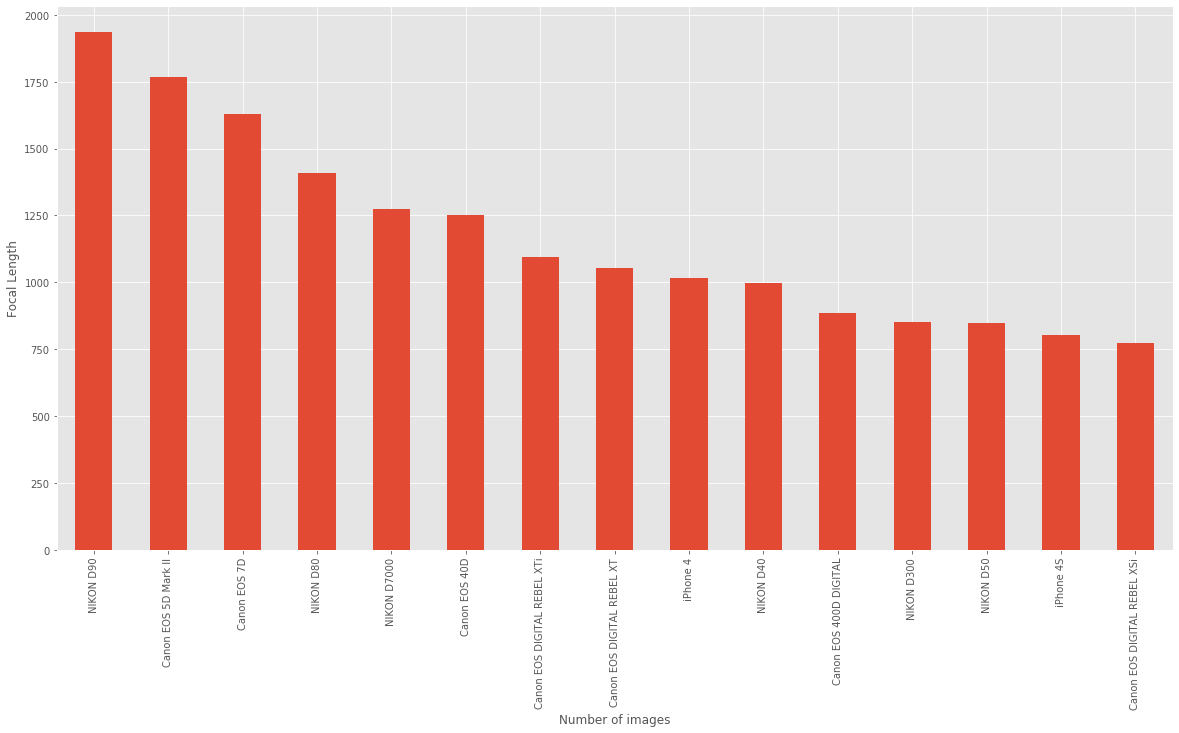

In [126]:
plot_by(by_model, 15, y_label = "Focal Length")

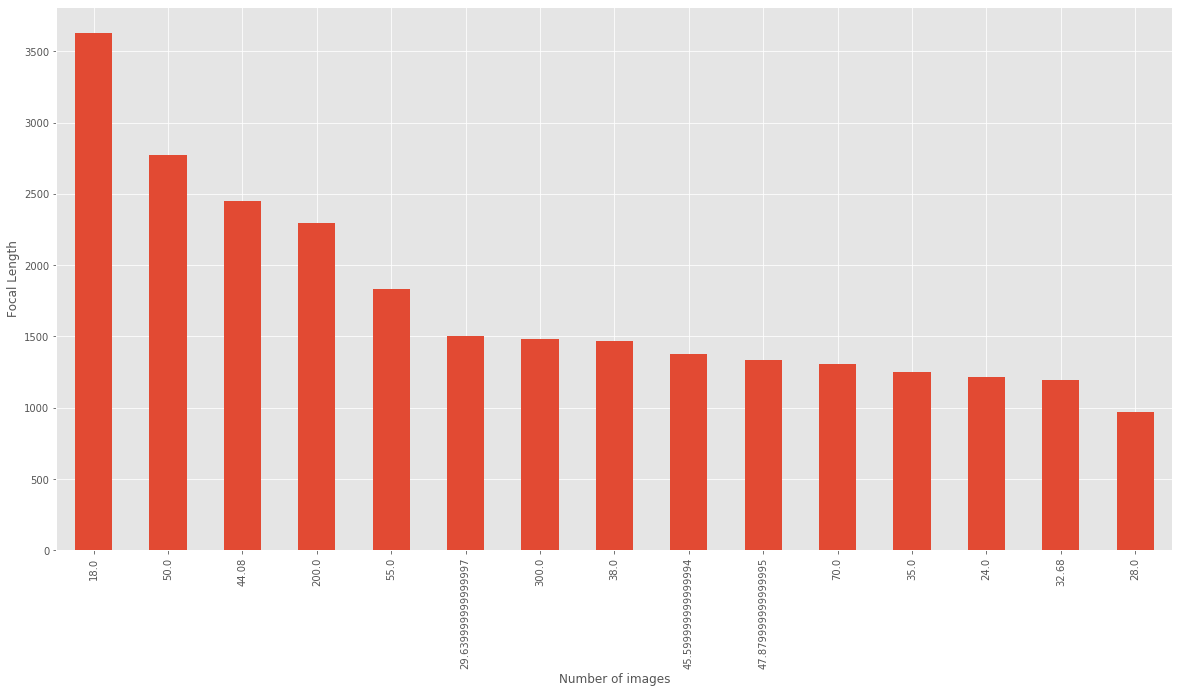

In [139]:
plot_by(by_fl, 15, y_label = "Focal Length")

In [135]:
fl_cats.tail(1).sum()

1146

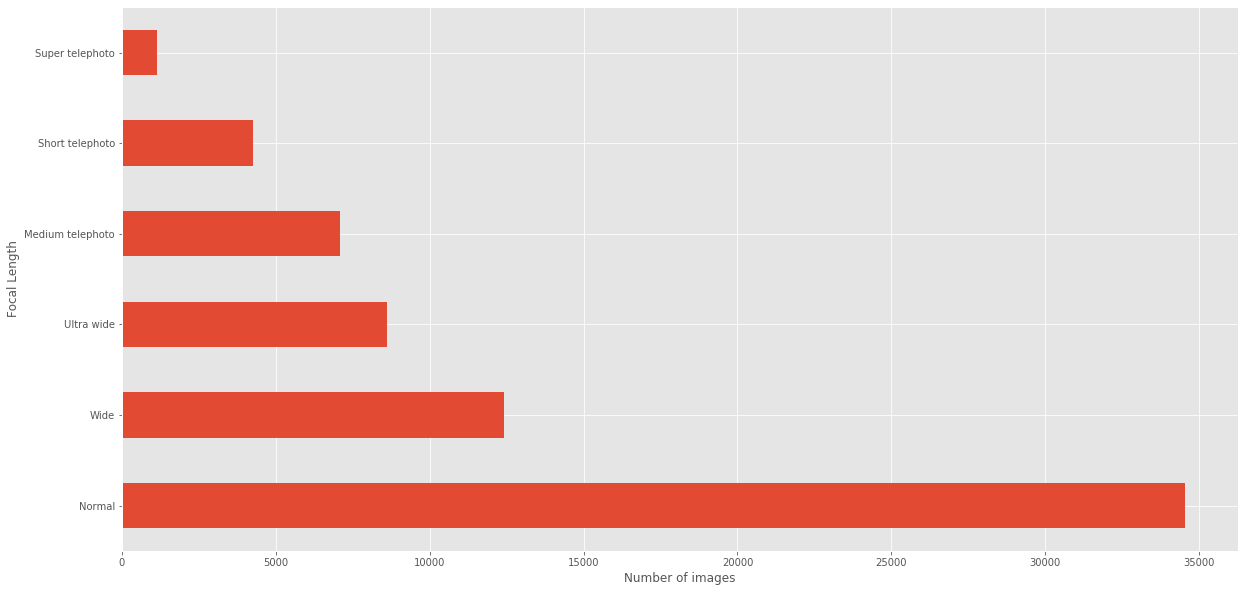

In [54]:
plot_by(fl_cats, 6, y_label = "Focal Length")

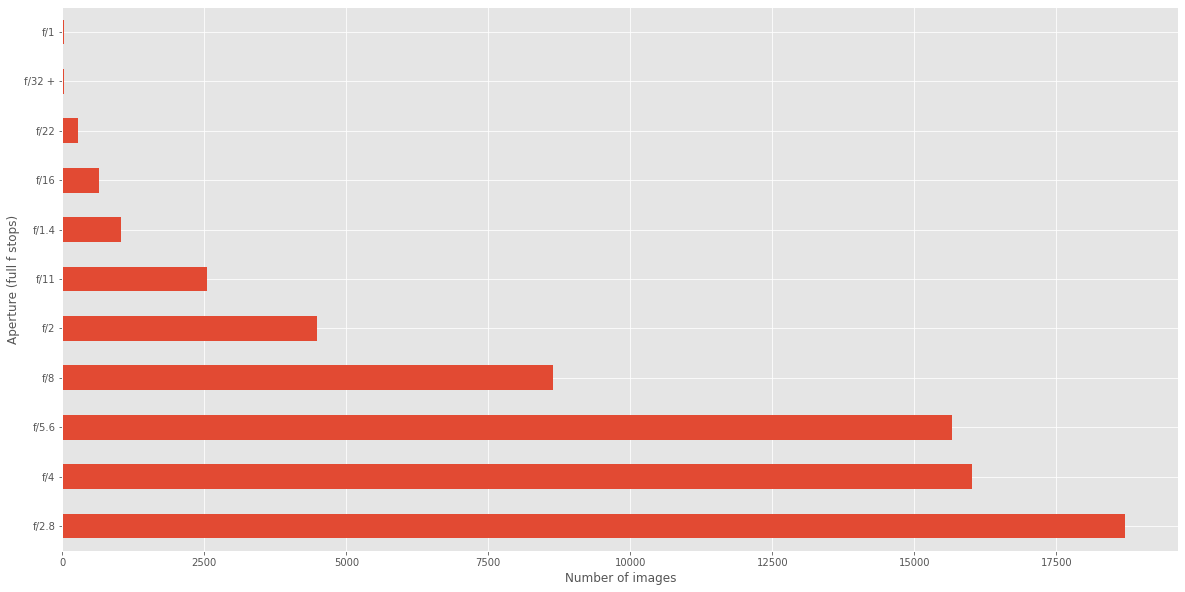

In [53]:
plot_by(f_cats, 11, y_label = "Aperture (full f stops)")

In [130]:
f_cats.head(3)

f/2.8    18713
f/4      16014
f/5.6    15670
Name: Aperture_cat, dtype: int64

In [134]:
by_exp.head(20)

Exposure
60.0      6093
500.0     4196
250.0     3968
400.0     3450
200.0     3361
125.0     3256
320.0     3252
30.0      2889
160.0     2728
1000.0    2633
800.0     2462
640.0     2456
100.0     2301
80.0      1802
15.0      1799
40.0      1747
50.0      1616
20.0      1529
1250.0    1415
1600.0    1129
dtype: int64

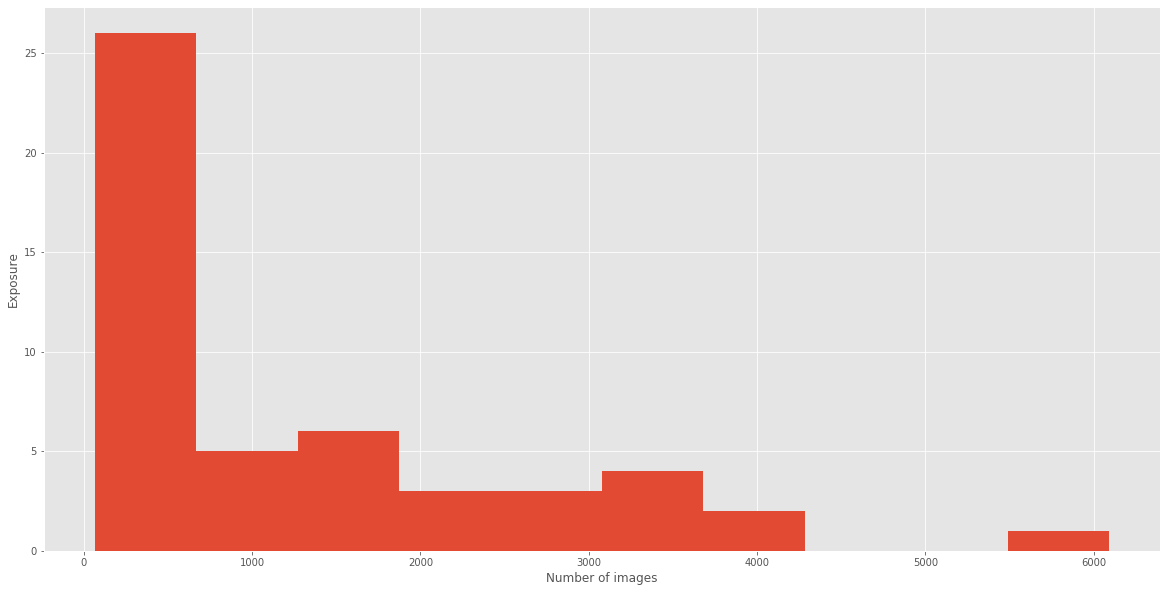

In [56]:
plot_by(by_exp, 50, y_label = "Exposure")

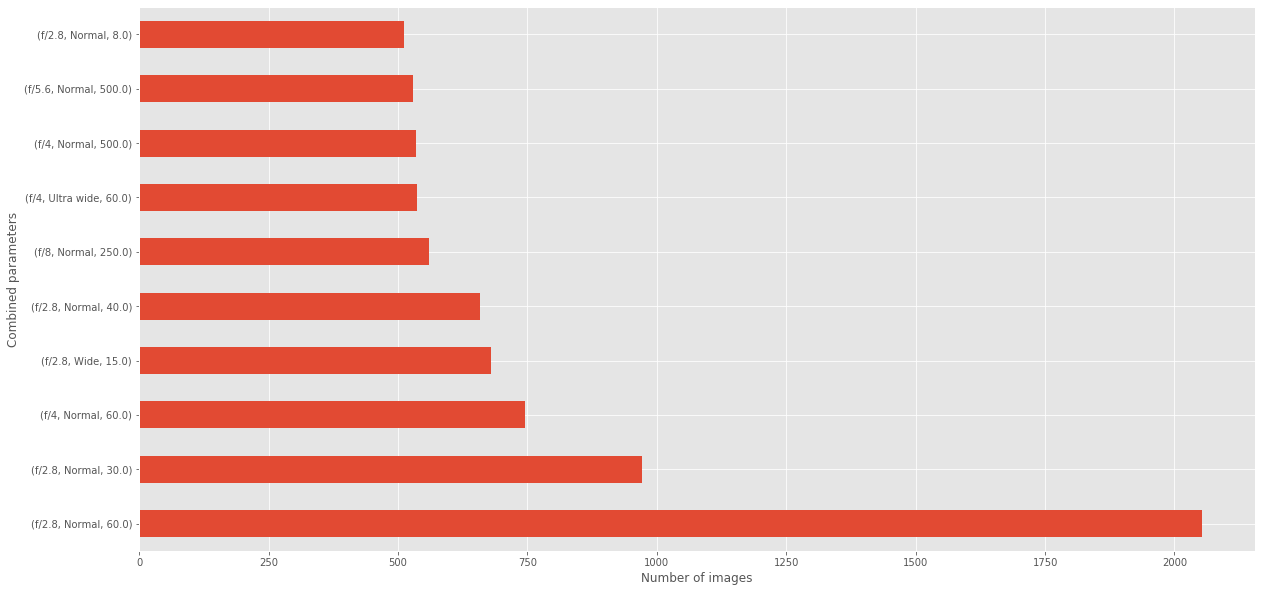

In [62]:
plot_by(by_practice, 10, y_label = "Combined parameters")

In [50]:
by_practice.sort_values(ascending=False).head(15)

Aperture_cat  FocalLength_cat   Exposure
f/2.8         Normal            60.0        2053
                                30.0         972
f/4           Normal            60.0         746
f/2.8         Wide              15.0         680
              Normal            40.0         658
f/8           Normal            250.0        560
f/4           Ultra wide        60.0         537
              Normal            500.0        535
f/5.6         Normal            500.0        529
f/2.8         Normal            8.0          512
f/4           Normal            400.0        503
f/5.6         Medium telephoto  500.0        489
f/2           Wide              20.0         486
f/5.6         Normal            200.0        476
                                125.0        473
dtype: int64

# Exports

In [52]:
#export dataset to CSV
#df1.to_csv('data/photo_dataset.csv')

In [55]:
#export dataset to HDF
df1.to_hdf('data/photo_dataset.h5', format='table', key='df1', mode='w')